# Importing Libraries

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing Data

In [7]:
cols = ['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years']
dataset = pd.read_csv("haberman.csv",header=None,names=cols)

In [8]:
dataset.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Tasks

**1. High level statistics of the dataset: number of points, number of features, number of classes, data-points per class.**

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [14]:
dataset.describe()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [21]:
dataset['survival_status_after_5_years'] = dataset['survival_status_after_5_years'].apply(lambda x: "Yes" if x==1 else 'No')

In [22]:
dataset.survival_status_after_5_years.value_counts()

Yes    225
No      81
Name: survival_status_after_5_years, dtype: int64

>**Ans - There are 4 features with 306 data points in each class**

**2. Explain our objective.**

>**Ans- Our objective is to do EDA on the dataset and to predict survival status of a patient after 5 years**

**3.Perform Univariate analysis(PDF, CDF, Boxplot, Violin plots) to understand which features are useful towards classification.**

### 1. PDF

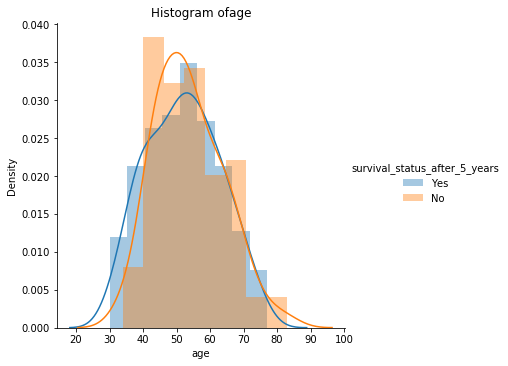

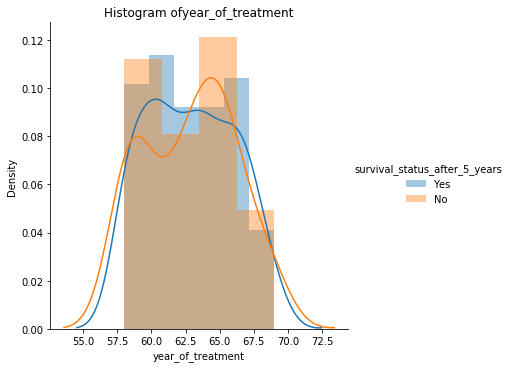

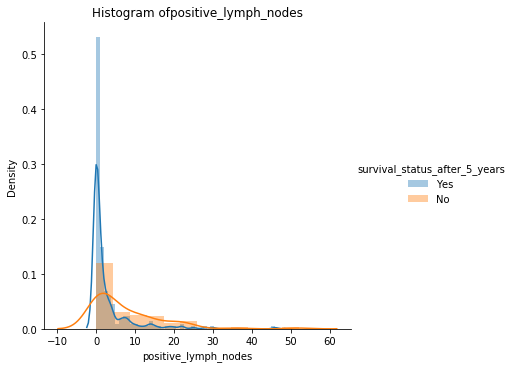

In [61]:
for cols in dataset.columns[:3]:
    sns.FacetGrid(dataset, hue = "survival_status_after_5_years", height = 5). map(sns.distplot,cols).add_legend()
    plt.title("Histogram of"+cols)
    plt.ylabel("Density")
    plt.show()

Some of the findings are--
1. We can say that 57% of the people survived who had 0-5 posive lymph node and approx 13% died as well
2. Both the plots are overlapping massively

### 2. CDF

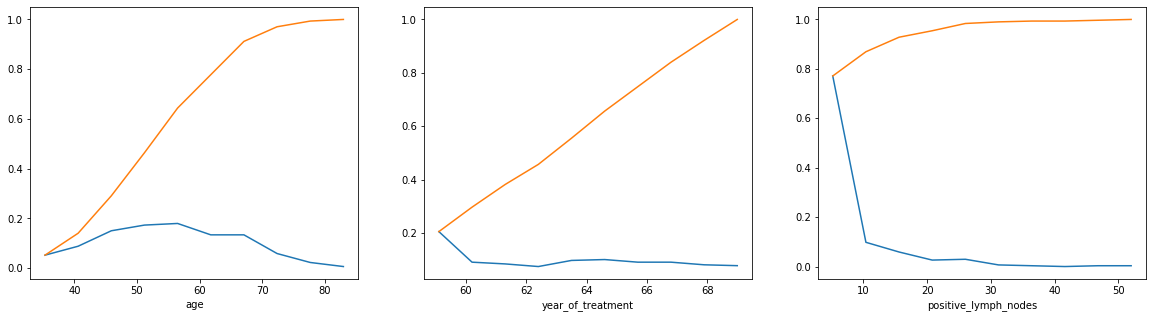

In [88]:
plt.figure(figsize=(20,5))
count = 1
for cols in dataset.columns[:3]:
    plt.subplot(1, 3, count)
    count+=1
    counts, bin_edges = np.histogram(dataset[cols], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(cols)

Some of the findings are ---
1. People with more than 40 positive lymph nodes are not survived

### 3. Box Plots

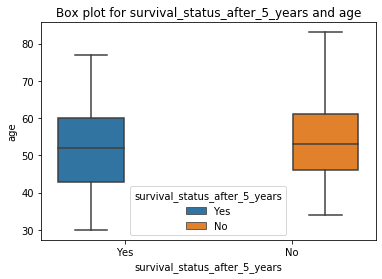

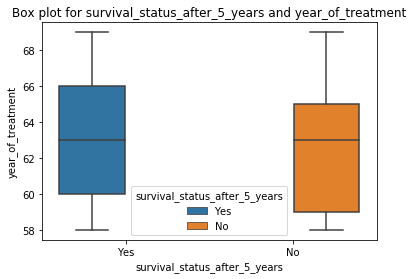

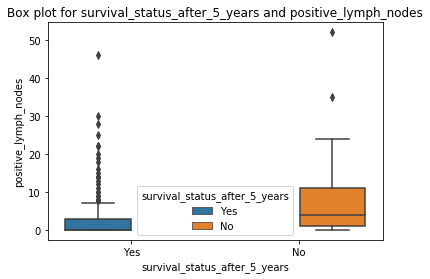

In [92]:
for cols in dataset.columns[:3]:
    sns.boxplot(x = "survival_status_after_5_years", y = cols, hue = "survival_status_after_5_years", data = dataset).set_title("Box plot for survival_status_after_5_years and "+cols)
    count+=1
    plt.show()

### 4. Violin Plots

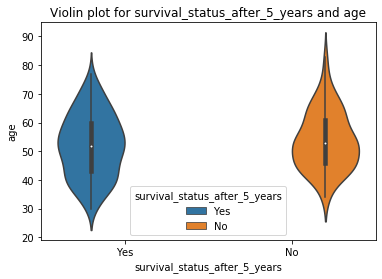

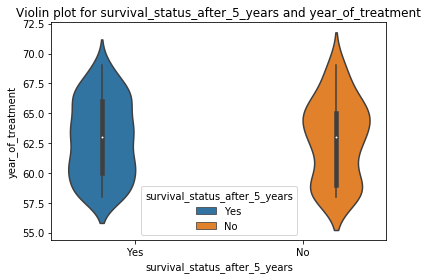

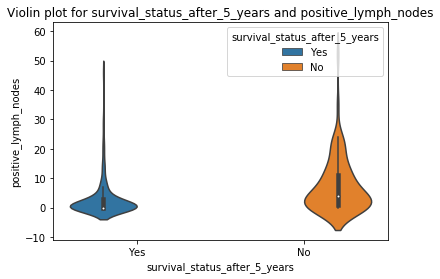

In [68]:
for cols in dataset.columns[:3]:
    sns.violinplot(x = "survival_status_after_5_years", y = cols, hue = "survival_status_after_5_years", data = dataset)
    count+=1
    plt.title("Violin plot for survival_status_after_5_years and " + cols)
    plt.show()

**4. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classification.**

### 1. Scatter Plots

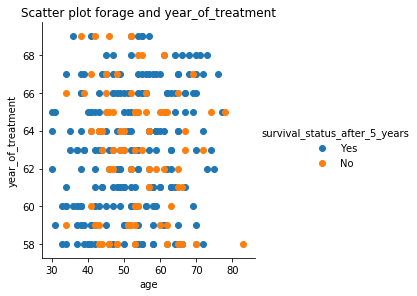

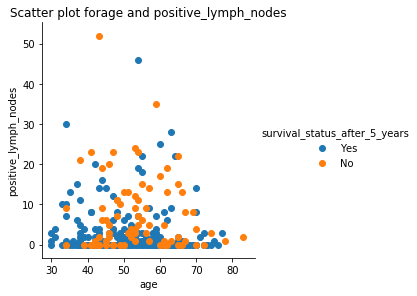

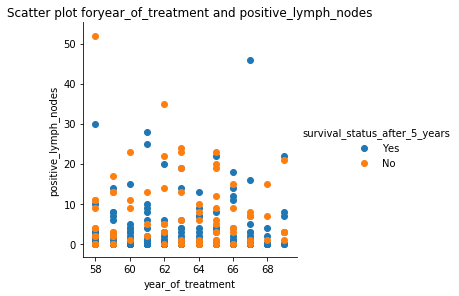

In [71]:
cols = dataset.columns[:3]
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        sns.FacetGrid(dataset, hue = "survival_status_after_5_years", height = 4).map(plt.scatter, cols[i], cols[j]).add_legend()
        plt.title("Scatter plot for" +cols[i]+" and "+cols[j])
        plt.show()

Some of the findings are--
1. By looking at the above scatter plot we can say that we can not seperate the classes.
2. More the positive lymph nodes less are the chances of survival of a person.

### 2. Pair Plots

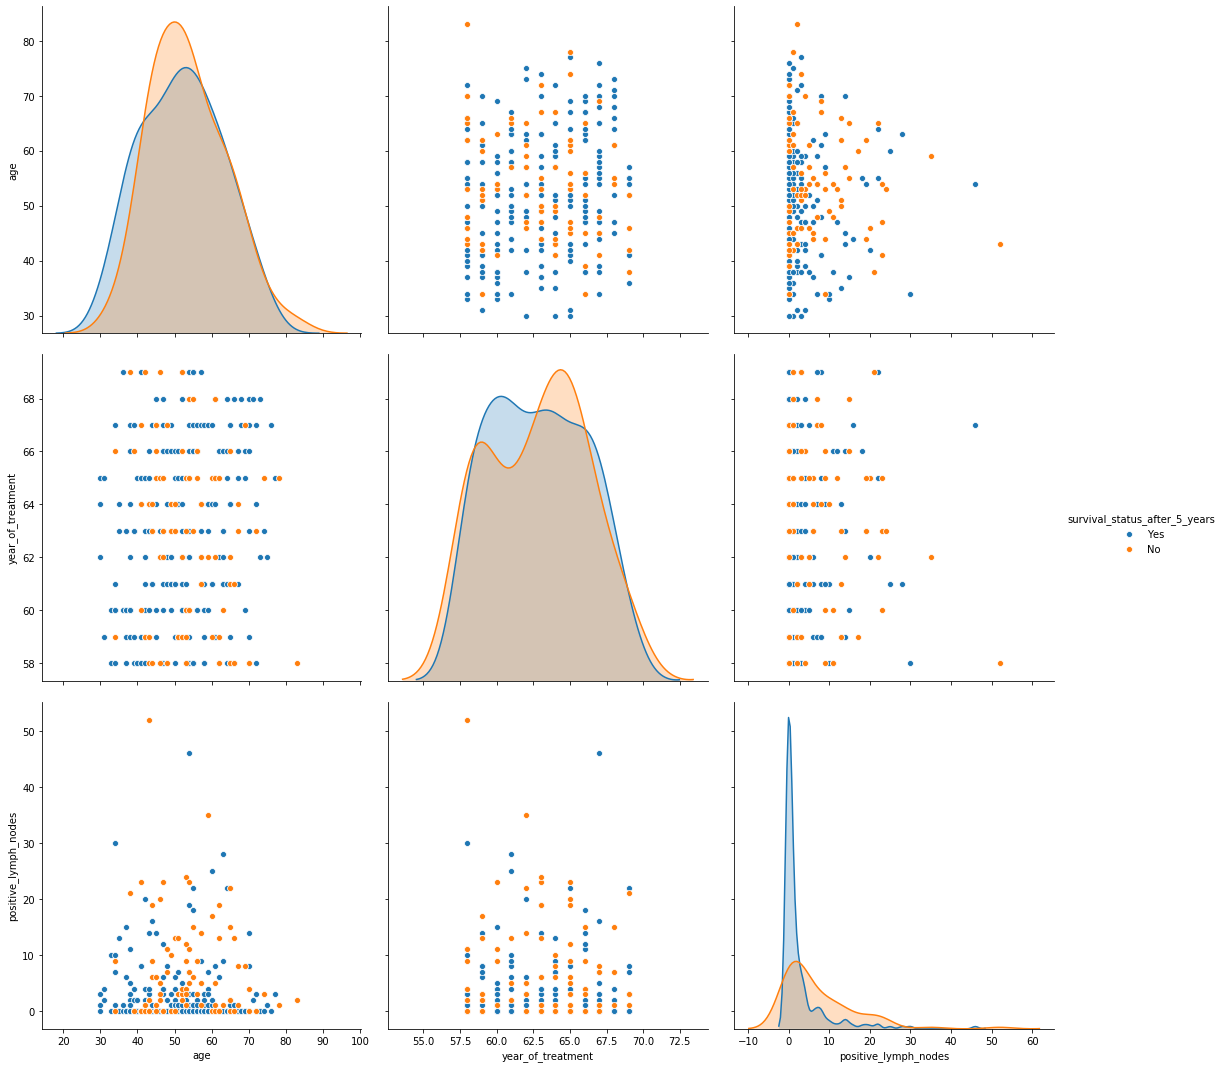

In [29]:
sns.pairplot(dataset,hue='survival_status_after_5_years',height=5)
plt.show()

Some of  the findings are ---
1. As there is too much overlapping it is difficult to classify which feature is important.
2. Plots are not informative in this case